# Computer Vision Lab: Image Processing & Object Detection

This lab covers fundamental computer vision concepts using OpenCV, including:
- Basic image operations
- Edge detection techniques
- Thresholding methods
- Pedestrian detection using HOG descriptors
- Camera calibration

---

## Prerequisites

Run the cell below to install and import required packages:

In [1]:
# Install required packages (uncomment if needed)
# !pip install opencv-python numpy imutils

import cv2 as cv
import numpy as np
import glob

# For displaying images in Jupyter
from IPython.display import display, Image
import matplotlib.pyplot as plt

# Configure matplotlib for inline display
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

print(f"OpenCV Version: {cv.__version__}")

OpenCV Version: 4.12.0


### Helper Function for Displaying Images

Since we're in a notebook, we'll use matplotlib instead of `cv.imshow()`:

In [2]:
def show_image(img, title="Image", cmap=None):
    """
    Display a single image using matplotlib.
    Automatically converts BGR to RGB for color images.
    """
    plt.figure(figsize=(8, 6))
    if len(img.shape) == 3:
        # Color image - convert BGR to RGB
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    else:
        # Grayscale image
        plt.imshow(img, cmap='gray' if cmap is None else cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_images(images, titles, rows=1, figsize=(15, 5)):
    """
    Display multiple images in a grid.
    """
    cols = len(images) // rows + (1 if len(images) % rows else 0)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    
    for idx, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 3:
            axes[idx].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        else:
            axes[idx].imshow(img, cmap='gray')
        axes[idx].set_title(title)
        axes[idx].axis('off')
    
    # Hide empty subplots
    for idx in range(len(images), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

---

## Part 1: Basic Image Operations

This section covers fundamental operations for reading, displaying, and manipulating images and videos.

### Workflow Overview

```mermaid
flowchart TD
    A[Input Source] --> B{Type?}
    B -->|Image| C[cv.imread]
    B -->|Video| D[cv.VideoCapture]
    C --> E[Image Processing]
    D --> F[Frame-by-Frame Processing]
    E --> G[Display/Save]
    F --> G
    
    subgraph "Image Processing Operations"
        E --> H[Grayscale Conversion]
        E --> I[Gaussian Blur]
        E --> J[Edge Detection]
        E --> K[Morphological Operations]
        E --> L[Cropping/Resizing]
    end
```

### 1.1 Reading and Displaying Images

Image shape: (1350, 1080, 3)
Image size: 1080x1350 pixels
Number of channels: 3


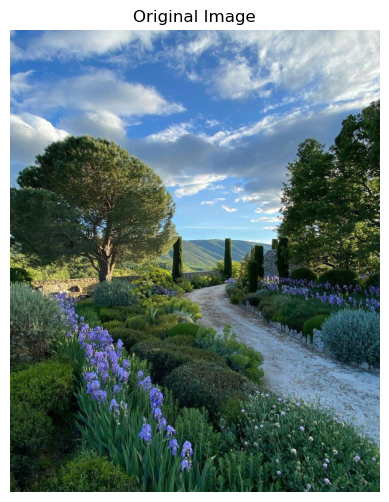

In [3]:
# Read an image from file
# Make sure 'example.jpg' is in the same directory or provide full path
img = cv.imread("example.jpg")

# Check if image was loaded successfully
if img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    print(f"Image shape: {img.shape}")
    print(f"Image size: {img.shape[1]}x{img.shape[0]} pixels")
    print(f"Number of channels: {img.shape[2]}")
    show_image(img, "Original Image")

### 1.2 Video Capture and Rescaling

When working with videos, you often need to resize frames for faster processing:

In [4]:
def rescale(frame, scale=0.75):
    """
    Rescale a frame by a given scale factor.
    
    Parameters:
        frame: Input image/frame
        scale: Scale factor (0.75 = 75% of original size)
    
    Returns:
        Resized frame
    """
    height = int(frame.shape[0] * scale)
    width = int(frame.shape[1] * scale)
    dimensions = (width, height)
    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)

# Demonstrate rescaling on an image
if img is not None:
    img_50 = rescale(img, 0.5)
    img_25 = rescale(img, 0.25)
    
    print(f"Original size: {img.shape[1]}x{img.shape[0]}")
    print(f"50% scale: {img_50.shape[1]}x{img_50.shape[0]}")
    print(f"25% scale: {img_25.shape[1]}x{img_25.shape[0]}")

Original size: 1080x1350
50% scale: 540x675
25% scale: 270x337


#### Video Processing Example

The following code demonstrates video processing (run locally, not in notebook):

```python

```

In [5]:
# Open video file
import cv2 as cv
capture = cv.VideoCapture('streetup.mp4')

while True:
    isTrue, frame = capture.read()

    if not isTrue:
        break

    # Rescale frame to 20% of original size
    frame_resized = rescale(frame, scale=0.2)

    cv.imshow("Original Video", frame)
    cv.imshow("Scaled Video", frame_resized)

    # Press 'd' to exit
    if cv.waitKey(20) & 0xFF == ord("d"):
        break

capture.release()
cv.destroyAllWindows()

### 1.3 Color Space Conversion

Converting images to grayscale is a common preprocessing step for many computer vision algorithms:

Original shape: (1350, 1080, 3) (Height, Width, Channels)
Grayscale shape: (1350, 1080) (Height, Width)


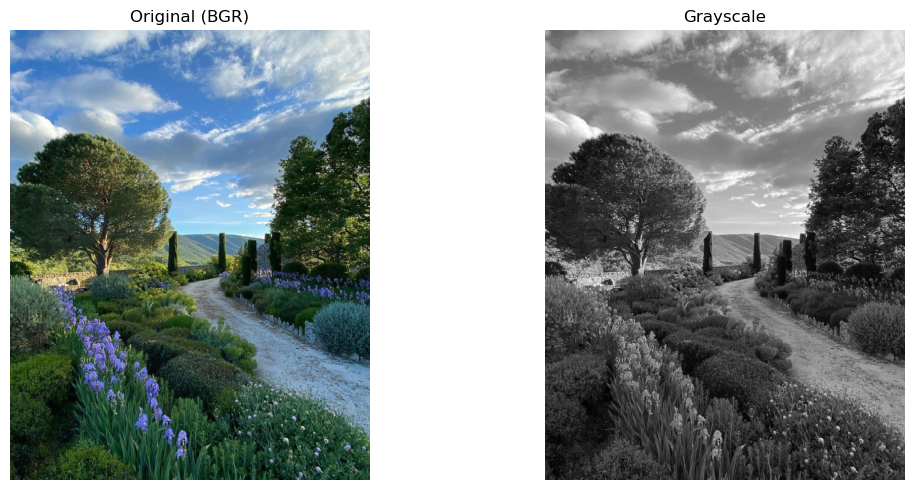

In [6]:
if img is not None:
    # Convert BGR to Grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    print(f"Original shape: {img.shape} (Height, Width, Channels)")
    print(f"Grayscale shape: {gray.shape} (Height, Width)")
    
    show_images([img, gray], ["Original (BGR)", "Grayscale"], figsize=(12, 5))

### 1.4 Gaussian Blur

Gaussian blur is used to reduce noise and detail in images. It's often used as a preprocessing step before edge detection.

**Kernel Size:** Must be odd numbers (3×3, 5×5, 7×7). Larger kernels produce more blur.

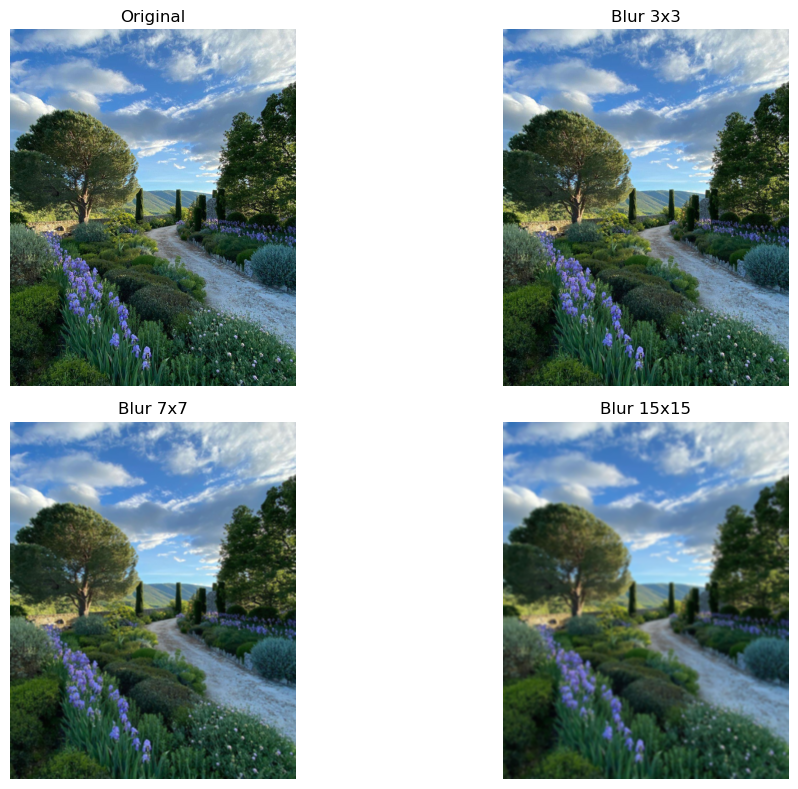

In [7]:
if img is not None:
    # Apply Gaussian Blur with different kernel sizes
    blur_3 = cv.GaussianBlur(img, (3, 3), cv.BORDER_DEFAULT)
    blur_7 = cv.GaussianBlur(img, (7, 7), cv.BORDER_DEFAULT)
    blur_15 = cv.GaussianBlur(img, (15, 15), cv.BORDER_DEFAULT)
    
    show_images(
        [img, blur_3, blur_7, blur_15],
        ["Original", "Blur 3x3", "Blur 7x7", "Blur 15x15"],
        rows=2,
        figsize=(12, 8)
    )

### 1.5 Morphological Operations

Morphological operations are used to process binary images or enhance features:

```mermaid
flowchart LR
    A[Input Image] --> B[Canny Edge Detection]
    B --> C{Operation}
    C -->|Dilation| D[Expand White Regions]
    C -->|Erosion| E[Shrink White Regions]
    D --> F[Output]
    E --> F
```

- **Dilation:** Expands white regions (useful for connecting broken edges)
- **Erosion:** Shrinks white regions (useful for removing noise)

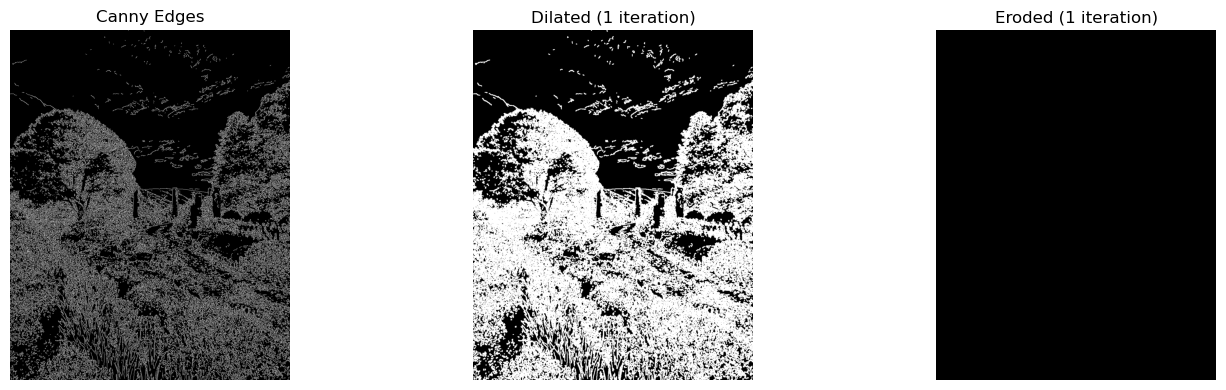

In [8]:
if img is not None:
    # First, detect edges using Canny
    canny = cv.Canny(img, 125, 175)
    
    # Create a kernel for morphological operations
    kernel = np.ones((3, 3), np.uint8)
    
    # Dilation - expands white regions
    dilated = cv.dilate(canny, kernel, iterations=1)
    
    # Erosion - shrinks white regions
    eroded = cv.erode(canny, kernel, iterations=1)
    
    show_images(
        [canny, dilated, eroded],
        ["Canny Edges", "Dilated (1 iteration)", "Eroded (1 iteration)"],
        figsize=(15, 4)
    )

### 1.6 Image Cropping

Cropping extracts a region of interest (ROI) from an image using array slicing:

Original size: 1080x1350
Cropped region: [337:1012, 270:810]
Cropped size: 540x675


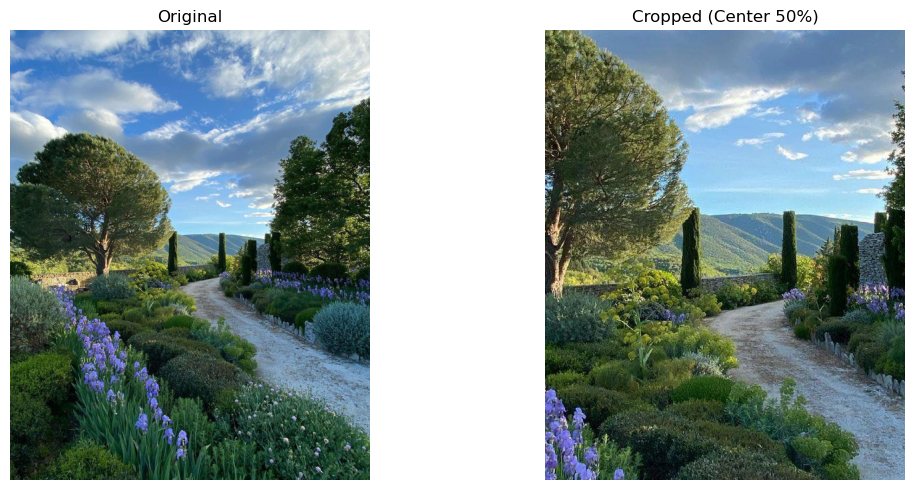

In [9]:
if img is not None:
    # Syntax: image[y_start:y_end, x_start:x_end]
    # Let's crop the center of the image
    h, w = img.shape[:2]
    
    # Crop center region (50% of width and height)
    y_start, y_end = h//4, 3*h//4
    x_start, x_end = w//4, 3*w//4
    
    crop = img[y_start:y_end, x_start:x_end]
    
    print(f"Original size: {w}x{h}")
    print(f"Cropped region: [{y_start}:{y_end}, {x_start}:{x_end}]")
    print(f"Cropped size: {crop.shape[1]}x{crop.shape[0]}")
    
    show_images([img, crop], ["Original", "Cropped (Center 50%)"], figsize=(12, 5))

---

## Part 2: Edge Detection

Edge detection identifies boundaries within images where brightness changes sharply. This is fundamental for object detection, image segmentation, and feature extraction.

### Edge Detection Methods Comparison

```mermaid
flowchart TD
    A[Input Grayscale Image] --> B[Edge Detection Method]
    
    B --> C[Laplacian]
    B --> D[Sobel]
    B --> E[Canny]
    
    C --> C1[Second-order derivative]
    C1 --> C2[Detects edges in all directions]
    C2 --> C3[Sensitive to noise]
    
    D --> D1[First-order derivative]
    D1 --> D2[Separate X and Y gradients]
    D2 --> D3[Can combine for full edges]
    
    E --> E1[Multi-stage algorithm]
    E1 --> E2[Noise reduction + Gradient + NMS + Hysteresis]
    E2 --> E3[Best for clean edge detection]
```

### 2.1 Laplacian Edge Detection

The Laplacian operator calculates the **second derivative** of the image, highlighting regions of rapid intensity change.

**Why use `cv.CV_64F`?** The Laplacian can produce negative values when transitioning from light to dark. Using a 64-bit float preserves these values before taking the absolute.

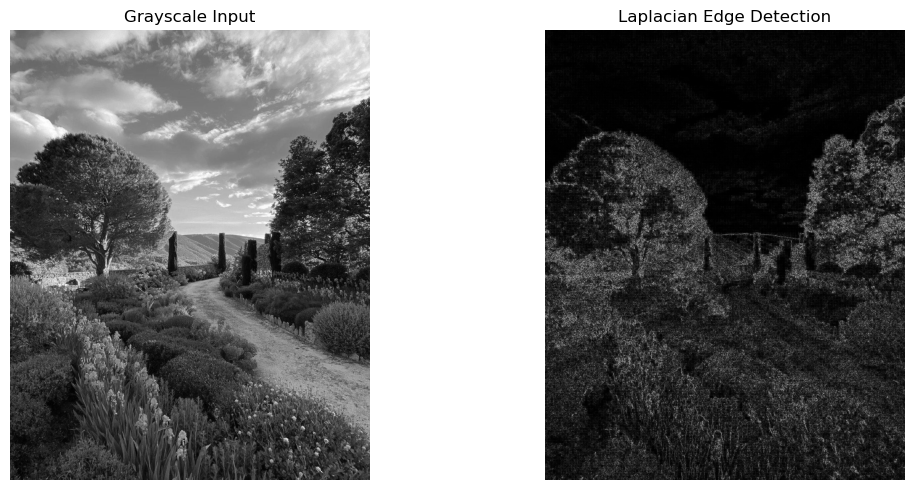

In [10]:
if img is not None:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Apply Laplacian operator
    # cv.CV_64F allows for negative values (important for edge detection)
    lap = cv.Laplacian(gray, cv.CV_64F)
    
    # Convert back to uint8 for display (take absolute values)
    lap_abs = np.uint8(np.absolute(lap))
    
    show_images(
        [gray, lap_abs],
        ["Grayscale Input", "Laplacian Edge Detection"],
        figsize=(12, 5)
    )

### 2.2 Sobel Edge Detection

The Sobel operator computes the **gradient of image intensity** separately in X and Y directions.

**Sobel Parameters:**
- `cv.Sobel(src, ddepth, dx, dy)`
- `dx=1, dy=0`: Detect **vertical edges** (gradient in horizontal direction)
- `dx=0, dy=1`: Detect **horizontal edges** (gradient in vertical direction)

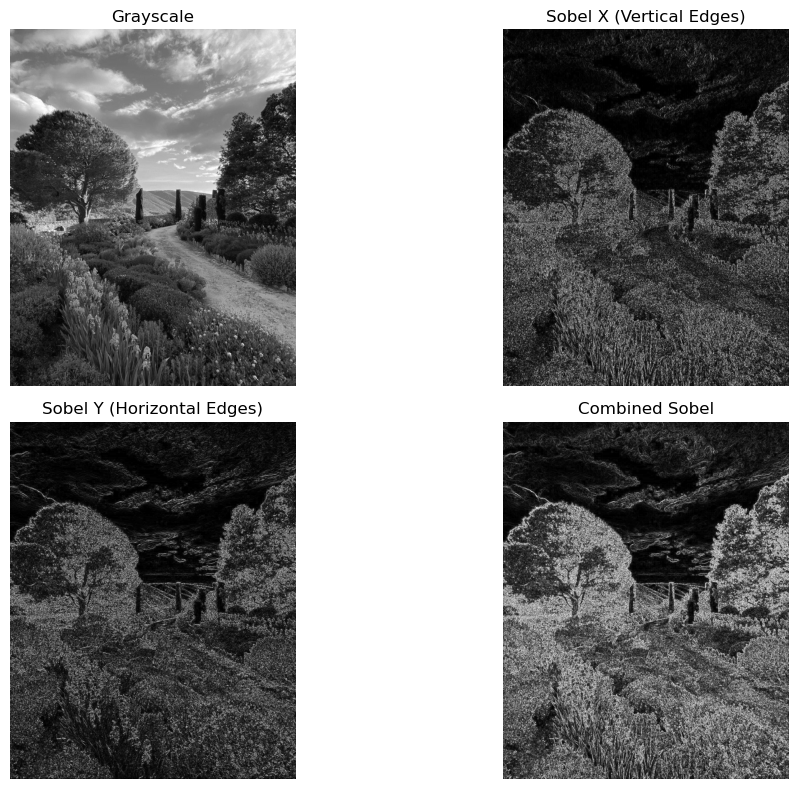

In [11]:
if img is not None:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Sobel X - detects vertical edges (gradient in horizontal direction)
    sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
    sobelx_abs = np.uint8(np.absolute(sobelx))
    
    # Sobel Y - detects horizontal edges (gradient in vertical direction)
    sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
    sobely_abs = np.uint8(np.absolute(sobely))
    
    # Combine both gradients using bitwise OR
    combined_sobel = cv.bitwise_or(sobelx_abs, sobely_abs)
    
    show_images(
        [gray, sobelx_abs, sobely_abs, combined_sobel],
        ["Grayscale", "Sobel X (Vertical Edges)", "Sobel Y (Horizontal Edges)", "Combined Sobel"],
        rows=2,
        figsize=(12, 8)
    )

### 2.3 Canny Edge Detection

Canny is a **multi-stage algorithm** that provides clean, well-defined edges.

```mermaid
flowchart LR
    subgraph "Canny Algorithm Steps"
        A[1. Gaussian Blur] --> B[2. Gradient Calculation]
        B --> C[3. Non-Maximum Suppression]
        C --> D[4. Double Thresholding]
        D --> E[5. Edge Tracking by Hysteresis]
    end
```

**Threshold Selection:**
- Pixels with gradient > `upper_threshold` are **definite edges**
- Pixels with gradient < `lower_threshold` are **non-edges**
- Pixels in between are edges **only if connected to strong edges**

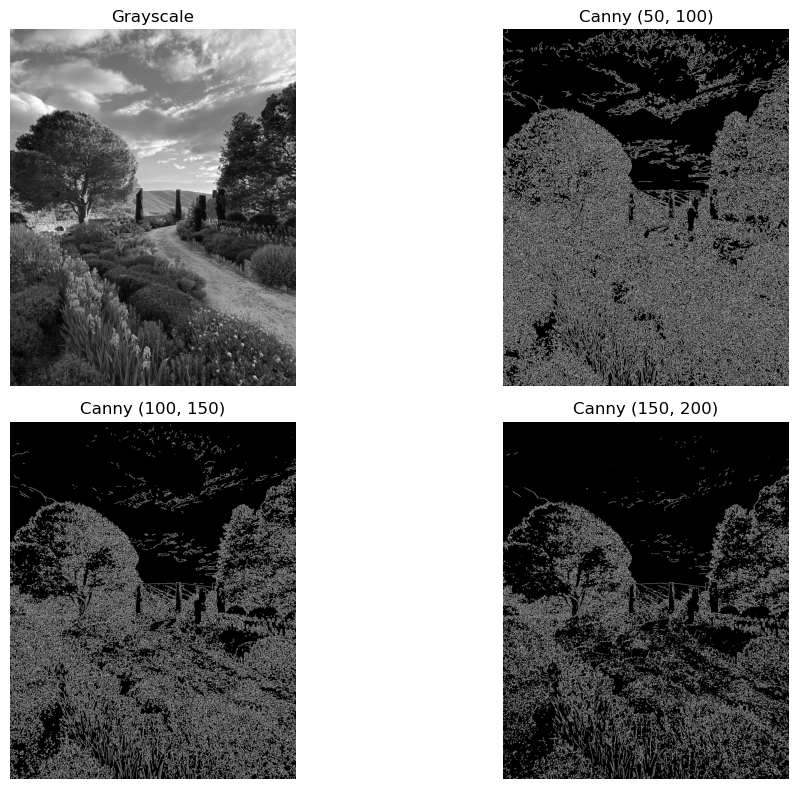

In [12]:
if img is not None:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Canny edge detection with different thresholds
    canny_low = cv.Canny(gray, 50, 100)      # Lower thresholds - more edges
    canny_med = cv.Canny(gray, 100, 150)     # Medium thresholds
    canny_high = cv.Canny(gray, 150, 200)    # Higher thresholds - fewer edges
    
    show_images(
        [gray, canny_low, canny_med, canny_high],
        ["Grayscale", "Canny (50, 100)", "Canny (100, 150)", "Canny (150, 200)"],
        rows=2,
        figsize=(12, 8)
    )

### Comparison of All Edge Detection Methods

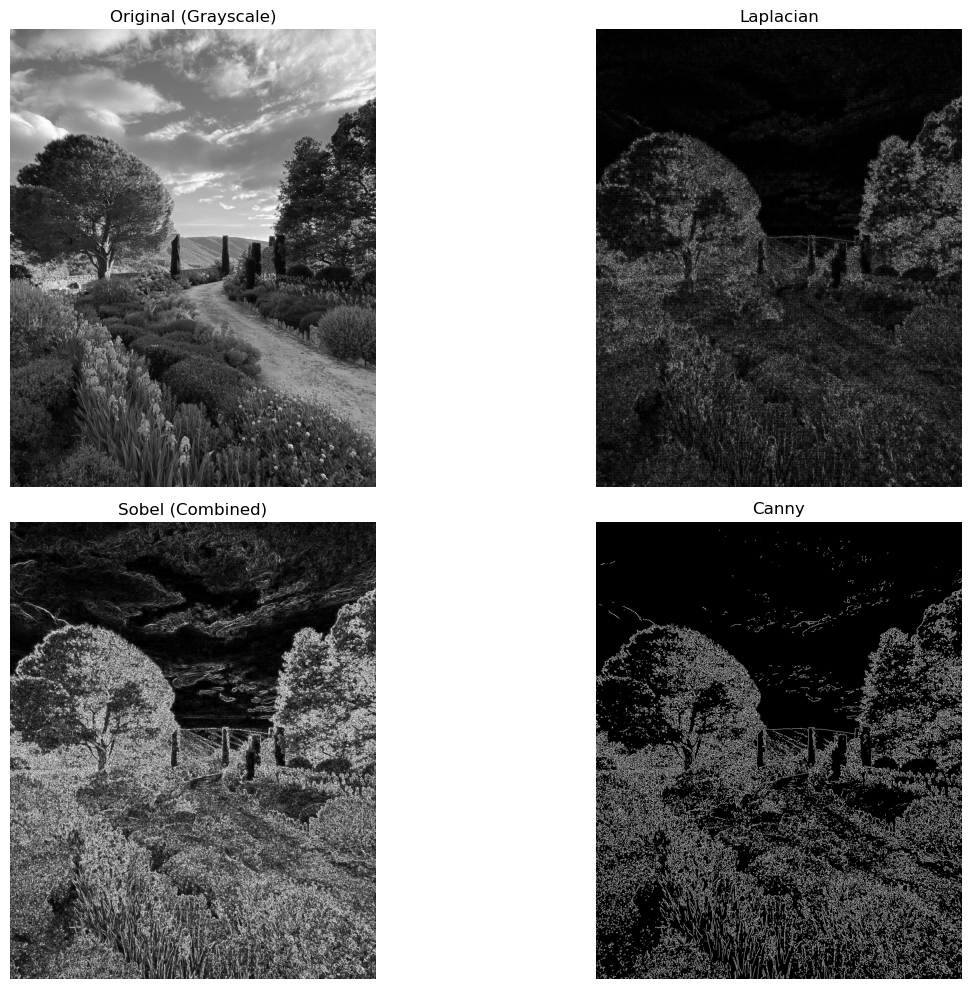

In [13]:
if img is not None:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Apply all methods
    lap = np.uint8(np.absolute(cv.Laplacian(gray, cv.CV_64F)))
    sobelx = np.uint8(np.absolute(cv.Sobel(gray, cv.CV_64F, 1, 0)))
    sobely = np.uint8(np.absolute(cv.Sobel(gray, cv.CV_64F, 0, 1)))
    combined_sobel = cv.bitwise_or(sobelx, sobely)
    canny = cv.Canny(gray, 150, 175)
    
    show_images(
        [gray, lap, combined_sobel, canny],
        ["Original (Grayscale)", "Laplacian", "Sobel (Combined)", "Canny"],
        rows=2,
        figsize=(14, 10)
    )

---

## Part 3: Thresholding Techniques

Thresholding is used to create **binary images** by separating pixels based on intensity values. This is essential for image segmentation.

### Thresholding Types Overview

```mermaid
flowchart TD
    A[Grayscale Image] --> B{Thresholding Type}
    
    B --> C[Simple/Global]
    B --> D[Adaptive]
    
    C --> C1[THRESH_BINARY]
    C --> C2[THRESH_BINARY_INV]
    
    D --> D1[ADAPTIVE_THRESH_MEAN_C]
    D --> D2[ADAPTIVE_THRESH_GAUSSIAN_C]
    
    C1 --> E[Fixed threshold for entire image]
    D1 --> F[Local threshold based on neighborhood]
```

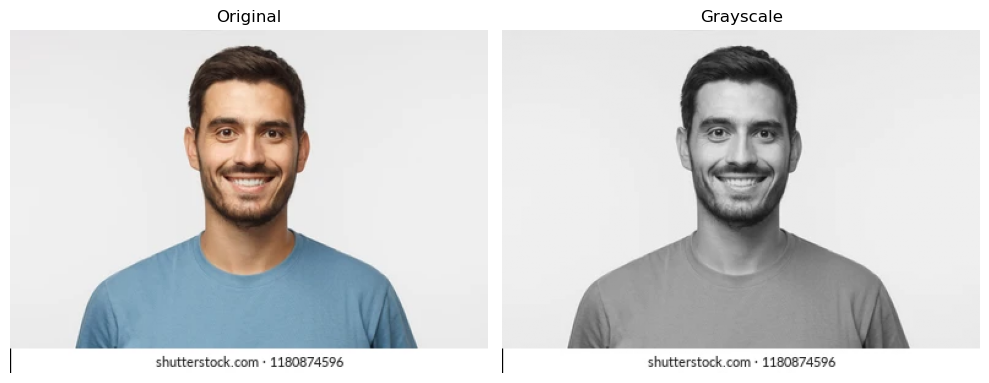

In [14]:
# Load the thresholding test image
img_thresh = cv.imread("img.png")

if img_thresh is None:
    print("Error: Could not load img.png. Using example.jpg instead.")
    img_thresh = img

if img_thresh is not None:
    gray_thresh = cv.cvtColor(img_thresh, cv.COLOR_BGR2GRAY)
    show_images([img_thresh, gray_thresh], ["Original", "Grayscale"], figsize=(10, 4))

### 3.1 Simple (Global) Thresholding

Applies a **single threshold value** to the entire image.

**Parameters:**
- `src`: Input grayscale image
- `thresh`: Threshold value (e.g., 150)
- `maxval`: Value assigned to pixels exceeding threshold (255)
- `type`: Thresholding type

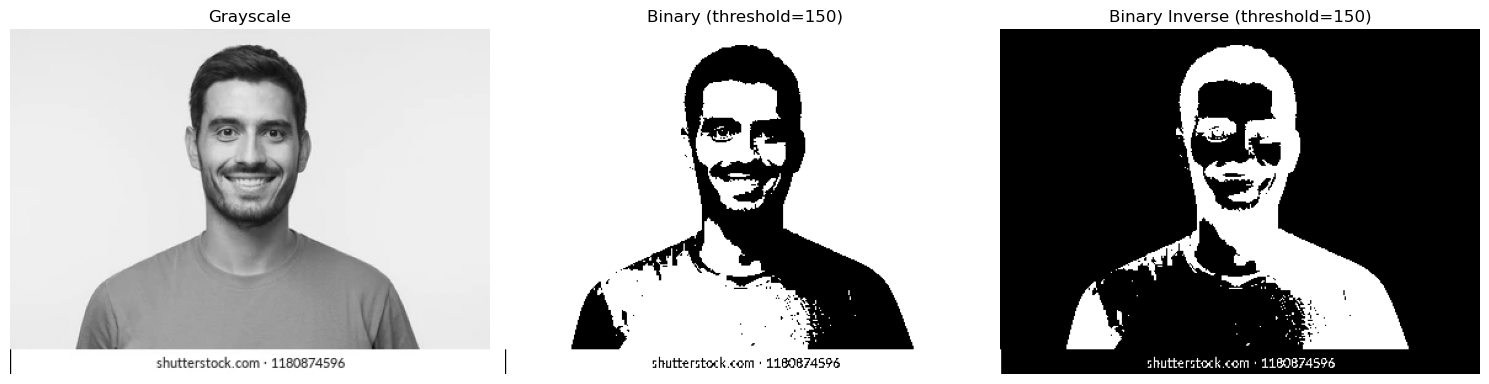

In [15]:
if img_thresh is not None:
    gray_thresh = cv.cvtColor(img_thresh, cv.COLOR_BGR2GRAY)
    
    # Binary Thresholding
    # Pixels > 150 become 255 (white), others become 0 (black)
    _, thresh_binary = cv.threshold(gray_thresh, 150, 255, cv.THRESH_BINARY)
    
    # Inverse Binary Thresholding
    # Pixels > 150 become 0 (black), others become 255 (white)
    _, thresh_binary_inv = cv.threshold(gray_thresh, 150, 255, cv.THRESH_BINARY_INV)
    
    show_images(
        [gray_thresh, thresh_binary, thresh_binary_inv],
        ["Grayscale", "Binary (threshold=150)", "Binary Inverse (threshold=150)"],
        figsize=(15, 4)
    )

#### Effect of Different Threshold Values

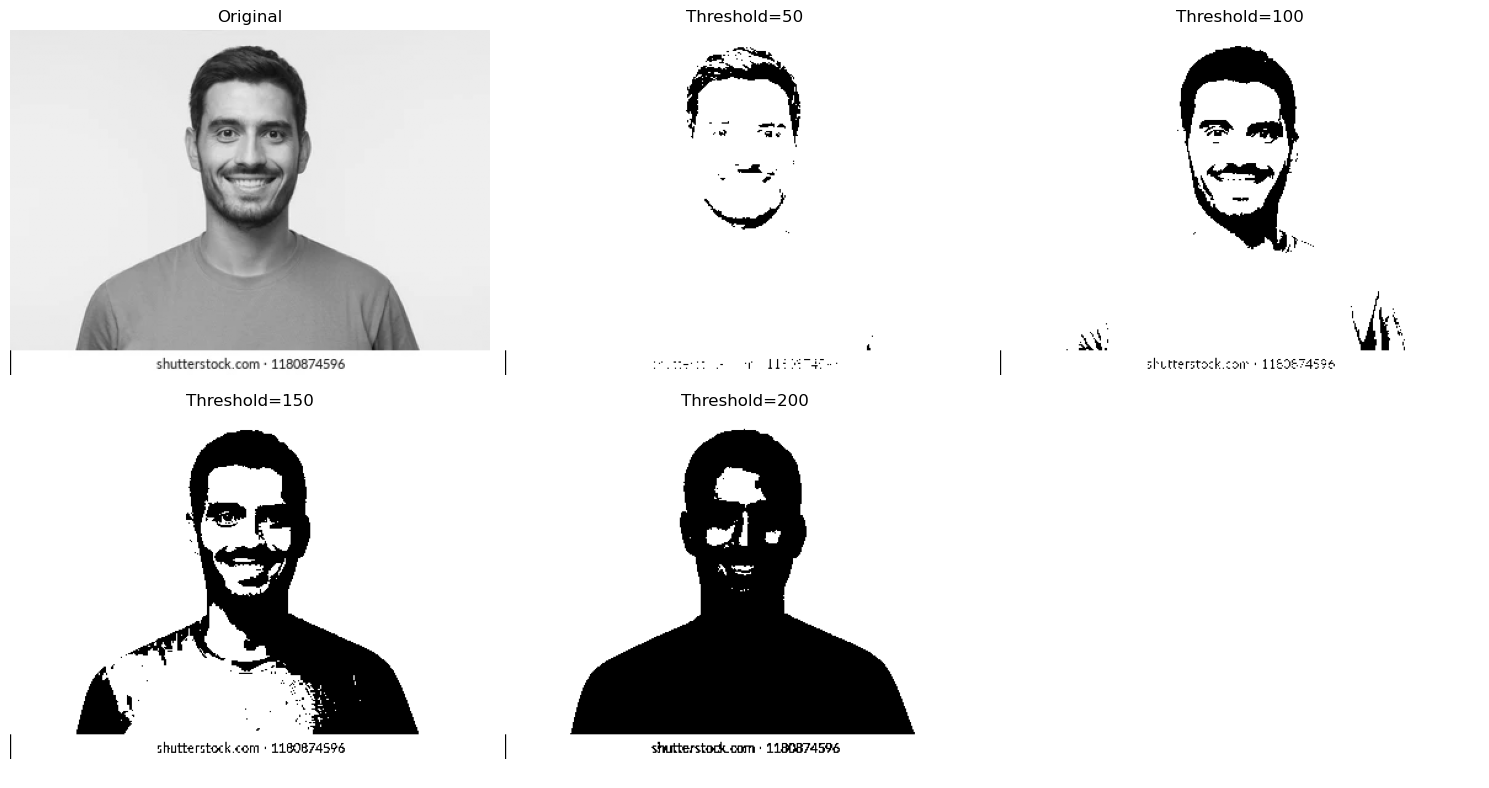

In [16]:
if img_thresh is not None:
    gray_thresh = cv.cvtColor(img_thresh, cv.COLOR_BGR2GRAY)
    
    # Different threshold values
    _, thresh_50 = cv.threshold(gray_thresh, 50, 255, cv.THRESH_BINARY)
    _, thresh_100 = cv.threshold(gray_thresh, 100, 255, cv.THRESH_BINARY)
    _, thresh_150 = cv.threshold(gray_thresh, 150, 255, cv.THRESH_BINARY)
    _, thresh_200 = cv.threshold(gray_thresh, 200, 255, cv.THRESH_BINARY)
    
    show_images(
        [gray_thresh, thresh_50, thresh_100, thresh_150, thresh_200],
        ["Original", "Threshold=50", "Threshold=100", "Threshold=150", "Threshold=200"],
        rows=2,
        figsize=(15, 8)
    )

### 3.2 Adaptive Thresholding

Calculates threshold values **locally**, useful for images with varying illumination.

**Key Parameters:**
- **Block Size (11):** Size of the neighborhood area. Must be odd.
- **C (9):** Constant subtracted from the calculated threshold. Helps fine-tune results.

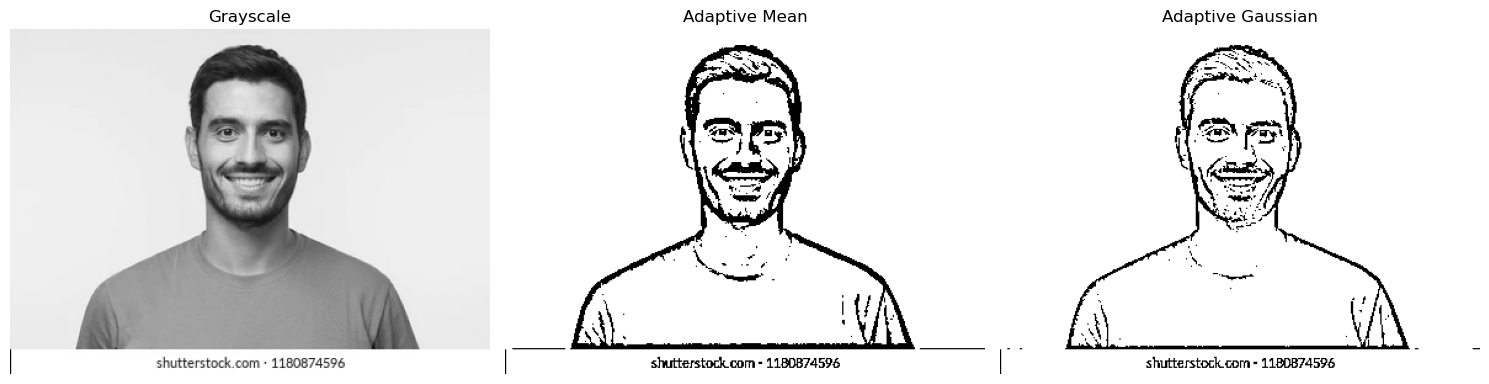

In [17]:
if img_thresh is not None:
    gray_thresh = cv.cvtColor(img_thresh, cv.COLOR_BGR2GRAY)
    
    # Adaptive Mean Thresholding
    # Threshold = mean of neighborhood area minus C
    adaptive_mean = cv.adaptiveThreshold(
        gray_thresh, 
        255,                          # Maximum value
        cv.ADAPTIVE_THRESH_MEAN_C,    # Method: use mean of neighborhood
        cv.THRESH_BINARY,             # Threshold type
        11,                           # Block size (neighborhood size)
        9                             # C (constant subtracted from mean)
    )
    
    # Adaptive Gaussian Thresholding
    # Threshold = weighted sum (Gaussian) of neighborhood minus C
    adaptive_gaussian = cv.adaptiveThreshold(
        gray_thresh, 
        255, 
        cv.ADAPTIVE_THRESH_GAUSSIAN_C,  # Method: use Gaussian-weighted sum
        cv.THRESH_BINARY, 
        11, 
        9
    )
    
    show_images(
        [gray_thresh, adaptive_mean, adaptive_gaussian],
        ["Grayscale", "Adaptive Mean", "Adaptive Gaussian"],
        figsize=(15, 4)
    )

### Comparison: Global vs Adaptive Thresholding

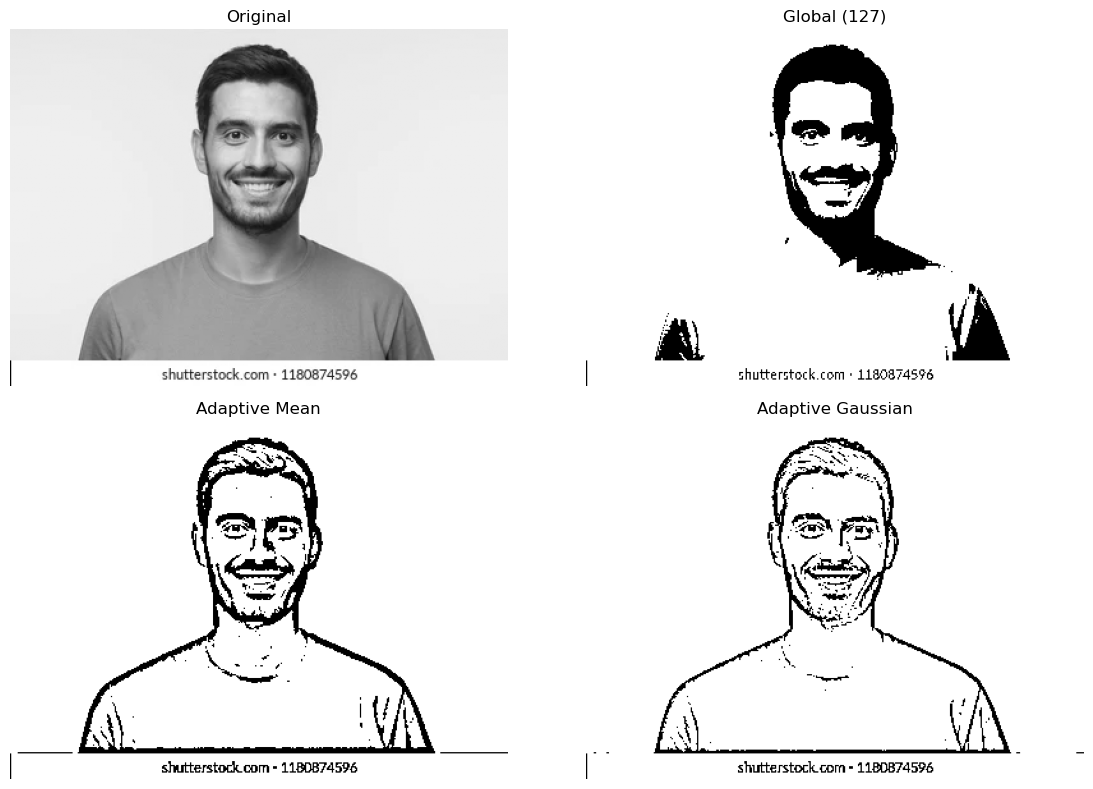


COMPARISON: Global vs Adaptive Thresholding
Feature                   Global               Adaptive            
------------------------------------------------------------
Threshold                 Single value         Local values        
Best for                  Uniform lighting     Varying lighting    
Speed                     Faster               Slower              
Parameters                One threshold        Block size + C      


In [18]:
if img_thresh is not None:
    gray_thresh = cv.cvtColor(img_thresh, cv.COLOR_BGR2GRAY)
    
    # Global threshold
    _, global_thresh = cv.threshold(gray_thresh, 127, 255, cv.THRESH_BINARY)
    
    # Adaptive thresholds
    adaptive_mean = cv.adaptiveThreshold(gray_thresh, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 9)
    adaptive_gaussian = cv.adaptiveThreshold(gray_thresh, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 9)
    
    show_images(
        [gray_thresh, global_thresh, adaptive_mean, adaptive_gaussian],
        ["Original", "Global (127)", "Adaptive Mean", "Adaptive Gaussian"],
        rows=2,
        figsize=(12, 8)
    )
    
    print("\n" + "="*60)
    print("COMPARISON: Global vs Adaptive Thresholding")
    print("="*60)
    print(f"{'Feature':<25} {'Global':<20} {'Adaptive':<20}")
    print("-"*60)
    print(f"{'Threshold':<25} {'Single value':<20} {'Local values':<20}")
    print(f"{'Best for':<25} {'Uniform lighting':<20} {'Varying lighting':<20}")
    print(f"{'Speed':<25} {'Faster':<20} {'Slower':<20}")
    print(f"{'Parameters':<25} {'One threshold':<20} {'Block size + C':<20}")

---

## Part 4: HOG Pedestrian Detection

**Histogram of Oriented Gradients (HOG)** is a feature descriptor used for object detection, particularly effective for detecting pedestrians.

### HOG Detection Pipeline

```mermaid
flowchart TD
    A[Input Video Frame] --> B[Resize Frame]
    B --> C[HOG Descriptor]
    C --> D[SVM Classifier]
    D --> E{Pedestrian Detected?}
    E -->|Yes| F[Draw Bounding Box]
    E -->|No| G[Next Frame]
    F --> G
    G --> A
```

### How HOG Works

```mermaid
flowchart LR
    subgraph "HOG Feature Extraction"
        A[1. Compute Gradients] --> B[2. Create Histograms in Cells]
        B --> C[3. Normalize across Blocks]
        C --> D[4. Concatenate into Feature Vector]
    end
    D --> E[SVM Classifier]
    E --> F[Detection Result]
```

1. **Gradient Computation:** Calculate magnitude and direction of gradients
2. **Cell Histograms:** Divide image into cells, create orientation histograms
3. **Block Normalization:** Normalize histograms across overlapping blocks
4. **Feature Vector:** Concatenate all block histograms into a single vector

### HOG Parameters Explained

| Parameter | Value | Description |
|-----------|-------|-------------|
| `winStride` | (4, 4) | Pixels to move the detection window each step. Smaller = more detections but slower |
| `padding` | (4, 4) | Padding added around the image. Helps detect objects near edges |
| `scale` | 1.05 | Image pyramid scaling factor. Lower = finer scale search but slower |

In [19]:
import imutils

# Initialize HOG descriptor
hog = cv.HOGDescriptor()

# Set the pre-trained SVM detector for people detection
hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector())

print("HOG Descriptor initialized with default people detector.")
print(f"Default window size: {hog.winSize}")
print(f"Block size: {hog.blockSize}")
print(f"Block stride: {hog.blockStride}")
print(f"Cell size: {hog.cellSize}")

HOG Descriptor initialized with default people detector.
Default window size: (64, 128)
Block size: (16, 16)
Block stride: (8, 8)
Cell size: (8, 8)


### Video Processing Code

The following code demonstrates pedestrian detection on video. Run this locally (not in notebook) for real-time detection:


In [21]:

import cv2
import imutils

# Initialize HOG descriptor
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Load video
cap = cv2.VideoCapture('streetup.mp4')

while cap.isOpened():
    ret, image = cap.read()

    if ret:
        # Resize for faster processing
        image = imutils.resize(image, width=min(400, image.shape[1]))

        # Detect pedestrians
        (regions, _) = hog.detectMultiScale(
            image,
            winStride=(4, 4),    # Step size for sliding window
            padding=(4, 4),      # Padding around detected regions
            scale=1.05           # Scale factor for image pyramid
        )

        # Draw rectangles around detected pedestrians
        for (x, y, w, h) in regions:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    cv2.imshow('Pedestrian Detection', image)

    # Press 'q' to quit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.12.0) /io/opencv/modules/highgui/src/window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


### Demonstration on Static Image

Number of pedestrians detected: 0


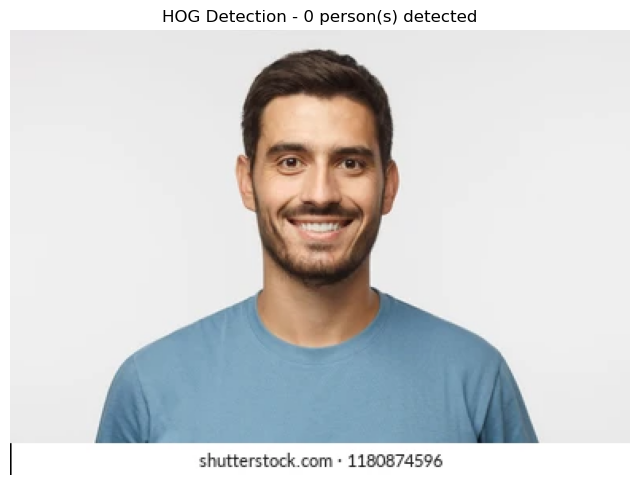

In [26]:
# If you have a test image with people, you can test HOG here
# For demonstration, we'll use the img.png if it contains people

if img_thresh is not None:
    # Resize for faster processing
    test_img = imutils.resize(img_thresh.copy(), width=min(400, img_thresh.shape[1]))
    
    # Detect pedestrians
    (regions, weights) = hog.detectMultiScale(
        test_img,
        winStride=(4, 4),
        padding=(4, 4),
        scale=1.05
    )
    
    # Draw rectangles around detected pedestrians
    for (x, y, w, h) in regions:
        cv.rectangle(test_img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    print(f"Number of pedestrians detected: {len(regions)}")
    show_image(test_img, f"HOG Detection - {len(regions)} person(s) detected")

---

## Part 5: Camera Calibration

Camera calibration determines the **intrinsic and extrinsic parameters** of a camera, essential for:
- 3D reconstruction
- Accurate measurements
- Removing lens distortion

### Camera Calibration Workflow

```mermaid
flowchart TD
    A[Capture Multiple Checkerboard Images] --> B[Detect Checkerboard Corners]
    B --> C[Refine Corner Positions]
    C --> D[Define 3D World Coordinates]
    D --> E[Calibrate Camera]
    E --> F[Obtain Camera Matrix]
    E --> G[Obtain Distortion Coefficients]
    E --> H[Obtain Rotation/Translation Vectors]
    
    subgraph "Output Parameters"
        F
        G
        H
    end
```

### Understanding Camera Parameters

**Camera Matrix (Intrinsic Parameters):**
```
[fx  0  cx]
[0  fy  cy]
[0   0   1]
```
- `fx, fy`: Focal lengths in pixels
- `cx, cy`: Principal point (optical center)

**Distortion Coefficients:**
- `[k1, k2, p1, p2, k3]`
- `k1, k2, k3`: Radial distortion coefficients
- `p1, p2`: Tangential distortion coefficients

**Extrinsic Parameters (per image):**
- `rvecs`: Rotation vectors
- `tvecs`: Translation vectors

### 5.1 Setup and Configuration

In [20]:
# Define checkerboard dimensions (internal corners)
# A 7x10 checkerboard has 6x9 internal corners
CHECKERBOARD = (6, 9)

# Termination criteria for corner refinement
# Stop when accuracy reaches 0.001 or after 30 iterations
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Storage for calibration data
objpoints = []  # 3D points in world coordinate system
imgpoints = []  # 2D points in image plane

# Create 3D coordinates for checkerboard corners
# Assuming checkerboard is at z=0 with square size = 1 unit
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:, :, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

print(f"Checkerboard size: {CHECKERBOARD}")
print(f"Number of corners: {CHECKERBOARD[0] * CHECKERBOARD[1]}")
print(f"\nSample 3D coordinates (first 5 points):")
print(objp[0, :5, :])

Checkerboard size: (6, 9)
Number of corners: 54

Sample 3D coordinates (first 5 points):
[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]]


### 5.2 Full Calibration Code

The following code processes calibration images from a folder:

```python

```

In [31]:
import cv2
import numpy as np
import glob

# Define checkerboard dimensions (internal corners)
CHECKERBOARD = (6, 9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Storage for points
objpoints = []
imgpoints = []

# 3D coordinates template
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:, :, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

# Load all calibration images
images = glob.glob('./images/*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find checkerboard corners
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)

    if ret == True:
        objpoints.append(objp)

        # Refine corner positions to sub-pixel accuracy
        corners2 = cv2.cornerSubPix(
            gray,
            corners,
            (11, 11),     # Search window size
            (-1, -1),     # No zero zone
            criteria      # Termination criteria
        )

        imgpoints.append(corners2)

        # Visualize detected corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        cv2.imshow('Detected Corners', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

# Perform calibration
h, w = img.shape[:2]
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints,
    imgpoints,
    gray.shape[::-1],
    None,
    None
)

# Print results
print("Camera Matrix:")
print(mtx)
print("\nDistortion Coefficients:")
print(dist)

Camera Matrix:
[[503.51179012   0.         313.41350161]
 [  0.         503.14610486 243.09110788]
 [  0.           0.           1.        ]]

Distortion Coefficients:
[[ 2.11014320e-01 -4.84232131e-01  3.54626601e-04 -2.22615779e-03
   2.58120488e-01]]


### Understanding the Calibration Output

In [29]:
# Example calibration output (simulated for demonstration)
print("="*60)
print("EXAMPLE CALIBRATION OUTPUT")
print("="*60)

# Example camera matrix
example_mtx = np.array([
    [1000.5, 0, 640.2],
    [0, 1000.3, 480.1],
    [0, 0, 1]
])

print("\nCamera Matrix (mtx):")
print(example_mtx)
print("\nInterpretation:")
print(f"  - Focal length X (fx): {example_mtx[0,0]:.1f} pixels")
print(f"  - Focal length Y (fy): {example_mtx[1,1]:.1f} pixels")
print(f"  - Principal point X (cx): {example_mtx[0,2]:.1f} pixels")
print(f"  - Principal point Y (cy): {example_mtx[1,2]:.1f} pixels")

# Example distortion coefficients
example_dist = np.array([[-0.15, 0.25, 0.001, -0.002, -0.12]])

print("\nDistortion Coefficients (dist):")
print(example_dist)
print("\nInterpretation:")
print(f"  - k1 (radial): {example_dist[0,0]:.4f}")
print(f"  - k2 (radial): {example_dist[0,1]:.4f}")
print(f"  - p1 (tangential): {example_dist[0,2]:.4f}")
print(f"  - p2 (tangential): {example_dist[0,3]:.4f}")
print(f"  - k3 (radial): {example_dist[0,4]:.4f}")

EXAMPLE CALIBRATION OUTPUT

Camera Matrix (mtx):
[[1.0005e+03 0.0000e+00 6.4020e+02]
 [0.0000e+00 1.0003e+03 4.8010e+02]
 [0.0000e+00 0.0000e+00 1.0000e+00]]

Interpretation:
  - Focal length X (fx): 1000.5 pixels
  - Focal length Y (fy): 1000.3 pixels
  - Principal point X (cx): 640.2 pixels
  - Principal point Y (cy): 480.1 pixels

Distortion Coefficients (dist):
[[-0.15   0.25   0.001 -0.002 -0.12 ]]

Interpretation:
  - k1 (radial): -0.1500
  - k2 (radial): 0.2500
  - p1 (tangential): 0.0010
  - p2 (tangential): -0.0020
  - k3 (radial): -0.1200


---

## Summary

| Topic | Key Functions | Purpose |
|-------|---------------|--------|
| Basic Operations | `imread`, `resize`, `cvtColor`, `GaussianBlur` | Image loading, scaling, color conversion |
| Edge Detection | `Laplacian`, `Sobel`, `Canny` | Finding boundaries and edges |
| Thresholding | `threshold`, `adaptiveThreshold` | Binary image segmentation |
| HOG Detection | `HOGDescriptor`, `detectMultiScale` | Pedestrian/object detection |
| Camera Calibration | `findChessboardCorners`, `calibrateCamera` | Camera parameter estimation |

---

## Exercises

### Exercise 1: Edge Detection Comparison
Apply all three edge detection methods to the same image and compare the results. Which method works best for your image and why?

In [22]:
# Your code here
# Hint: Load an image, apply Laplacian, Sobel, and Canny, then display side by side

### Exercise 2: Threshold Tuning
Experiment with different threshold values and block sizes in adaptive thresholding. Document the effect on the output.

In [23]:
# Your code here
# Hint: Try block sizes of 7, 11, 15, 21 and C values of 2, 5, 9, 15

### Exercise 3: HOG Parameter Tuning
Modify the `winStride`, `padding`, and `scale` parameters in HOG detection. How do these affect detection accuracy and speed?

In [24]:
# Your code here
# Hint: Try winStride of (2,2), (4,4), (8,8) and observe the difference

### Exercise 4: Camera Calibration
Capture your own checkerboard images and perform calibration. What happens if you use fewer images?

In [25]:
# Your code here
# Hint: Print a checkerboard pattern, take 10-20 photos from different angles

---

## References

- OpenCV Documentation: https://docs.opencv.org/
- HOG Paper: Dalal, N., & Triggs, B. (2005). "Histograms of Oriented Gradients for Human Detection"
- Camera Calibration: Zhang, Z. (2000). "A Flexible New Technique for Camera Calibration"